- KEYWORDS: scipy.optimize.fsolve, numpy.roots, numpy.polyder, numpy.polyval, numpy.polyint, numpy.poly1d



# Special nonlinear systems - polynomials



Polynomials are a special class of nonlinear algebraic equations that are especially easy to solve. A polynomial is linear in the coefficients in front of the variable. If we consider the following $n^{th}$ order polynomial:

$p_0 x^n + p_1 x^{(n-1)} + ... + p_{n-1} x + p_n = 0$

Let's be specific:

$x^2 + 8x + 16 = 0$

We express this as [1, 8, 16].



In [2]:
import numpy as np
?np.roots

In [3]:
p = [1, 8, 16]
r = np.roots(p)
r

array([-4., -4.])

In [4]:
np.polyval(p, [1, 2, 3])

array([25, 36, 49])

Note we get all the roots. We can check that with the `numpy.polyval` command.



In [5]:
np.polyval(p, r)

array([ 0.,  0.])

We can also use this to plot a polynomial.



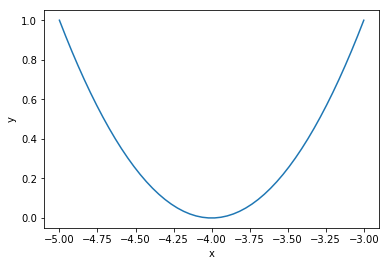

In [6]:
import numpy as np

x = np.linspace(-5, -3)
y = np.polyval(p, x)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [7]:
np.roots([1, 0, -2])  # x^2 - 2 = 0

array([ 1.41421356, -1.41421356])

In [8]:
np.roots([1, 0, 2])  # x^2 + 2 = 0  - This has imaginary roots:  a + bj

array([-0.+1.41421356j,  0.-1.41421356j])

Why is this so convenient?




## Cubic equations of state



There are applications of polynomials in thermodynamics. The van der waal equation is a cubic polynomial $f(V) = V^3 - \frac{p n b + n R T}{p} V^2 + \frac{n^2 a}{p}V - \frac{n^3 a b}{p} = 0$, where $a$ and $b$ are constants, $p$ is the pressure, $R$ is the gas constant, $T$ is an absolute temperature and $n$ is the number of moles. The roots of this equation tell you the volume of the gas at those conditions.



In [9]:
# numerical values of the constants
a = 3.49e4  # exponential notation
b = 1.45
p = 679.7   # pressure in psi
T = 683     # T in Rankine
n = 1.136   # lb-moles
R = 10.73   # ft^3 * psi / R / lb-mol

ppar = [1.0,                           # V^3
        -(p * n * b + n * R * T) / p,  # V^2
        n**2 * a / p,                  # V
        -n**3 * a * b / p]             # constant

print(np.roots(ppar))

[ 5.09432376+0.j          4.40066810+1.43502848j  4.40066810-1.43502848j]


In [10]:
r_real = 50.943237645545985  # bad style, but people do it in the real world.
r_real = r[0].real

In [11]:
np.polyder(ppar)

array([  3.        , -27.79131994,  66.26204267])

Note that only one root is real (and even then, we have to interpret 0.j as not being imaginary. Also, in a cubic polynomial, there can only be two imaginary roots). In this case that means there is only one phase present.




## Other useful things to remember about polynomials



You can easily get the parameters of the derivative of the polynomial with `numpy.polyder`.



In [12]:
p = [1, 8, 16]

pd = np.polyder(p)
pd

array([2, 8])

You can use these with `numpy.polyval` to compute the derivative at different points.



In [13]:
np.polyval(pd, [-5, -3,1, 2, 3])

array([-2,  2, 10, 12, 14])

In [14]:
np.polyder(p, 2)

array([2])

In [15]:
# sorting example
p = np.roots([1, 3, 2])
p = sorted(p, reverse=True)  # get the roots from largest to smallest

In [16]:
# alternative approach
print(p)
p.sort()
p[::-1]  # awkward syntax for reversing an array

[-1.0, -2.0]


[-1.0, -2.0]

You can also get the coefficients of the integral of the polynomial. The integration constant is assumed to be 0 by default.



In [17]:
p = [1, 8, 16]
pint = np.polyint(p)
pint

array([  0.33333333,   4.        ,  16.        ,   0.        ])

You can use this to compute definite integrals, e.g. from x=1 to x=2:



In [18]:
np.polyval(pint, 2) - np.polyval(pint, 1)

30.333333333333339

**exercise** Use another method to confirm the result above.

Finally, the syntax `np.polyval(pint, 2)` can be a little tedious. You can create a function with `numpy.poly1d` using the array of coefficients. Conveniently, you can use the function in the roots, polyder and polyint commands!



In [19]:
p = np.poly1d(pint)
p(2) - p(1)

30.333333333333339

In [20]:
np.roots(p)

array([-6.+3.46410162j, -6.-3.46410162j,  0.+0.j        ])


# Systems of nonlinear equations



Analogously to systems of ordinary differential equations, with systems of nonlinear equations we define functions that will return a zero for each equation in the system. Then we have to pass an initial guess for each variable to fsolve, and it will return an array of values, one for each variable.

It is considerably more difficult to visualize systems of nonlinear equations. With two equations and two unknowns it is sometimes easy to plot solutions, but not always.

\begin{align}
y &=& x^2 \\
y &=& 8 - x^2
\end{align}

One approach to visualizing this is to plot the two curves.



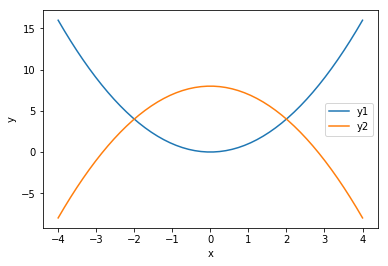

In [21]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-4, 4)

y1 = x**2
y2 = 8 - x**2

plt.plot(x, y1, x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y1', 'y2'])

You can see that on this domain, there is one place where the two curves intersect near the point (2, 5), which is a solution point. At this point there is one (x, y) pair that is a solution to *both* equations.



In [22]:
from scipy.optimize import fsolve

def objective(X):
    x, y = X  # These are what we want to solve for
    z1 = y - x**2  # first zero
    z2 = y - 8 + x**2 # second zero from second equation
    return np.array([z1, z2])

guess = [2, 5]
fsolve(objective, guess)

array([ 2.,  4.])

It is not always easy to solve for one variable in terms of the other though. In that case, we can resort to an alternate graphical approach where we evaluate the objective function over a range of the variables, and look for regions where they overlap.

Consider the solution to these equations (adapted from [https://www.mathworks.com/help/optim/ug/fsolve.html](https://www.mathworks.com/help/optim/ug/fsolve.html)):

$e^{-e^{-(x_1 + x_2)}} = x_2 (1 + x_1^2)$

and

$x_1 \cos(x_2) + x_2 \sin(x_1) = 1/2$

It is not possible to solve either one for one variable in terms of the other. So instead, we will compute the objective function for a range of $x_1, x_2$ values, and then use a contour plot of each equation to see where there might be a solution.

The key to this visualization is where we draw the contours. A good choice is to highlight only the part of the solutions that bracket zero. Then we can see where they intersect, because there is probably a solution in that neighborhood.



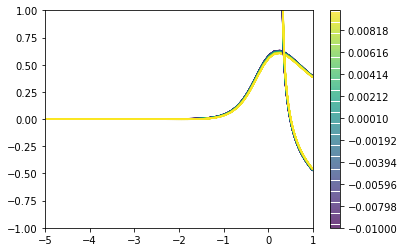

In [23]:
def objective(X):
    x1, x2 = X
    z1 = np.exp(-np.exp(-(x1 + x2))) - x2 * (1 + x1**2)
    z2 = x1 * np.cos(x2) + x2 * np.sin(x1) - 0.5
    return np.array([z1, z2])


x1 = np.linspace(-5, 1)
x2 = np.linspace(-1, 1)

X1, X2 = np.meshgrid(x1, x2)

Z1, Z2 = objective([X1, X2])

plt.contour(X1, X2, Z1, levels=np.linspace(-0.01, 0.01, 100))
plt.contour(X1, X2, Z2, levels=np.linspace(-0.01, 0.01, 100))
#plt.xlabel('$x_1$')
#plt.ylabel('$x_2$')
plt.colorbar()

There is an intersection near $x_1=0.4$, and $x_2 = 0.6$. We can use that as an initial guess.



In [82]:
ans = fsolve(objective, [-4, -0.6])  # note we do not need ans, because ans will have two values in it.
ans, objective(ans)

/Users/jkitchin/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


(array([-0.112606  , -0.79519102]), array([ 0.88911324, -0.48948675]))

In [87]:
fsolve(objective, [-4, 0.6], full_output=1)

(array([ 0.35324662,  0.60608174]), {'fjac': array([[-0.97576973, -0.21880001],
         [ 0.21880001, -0.97576973]]),
  'fvec': array([ -1.49991131e-13,   2.59792188e-14]),
  'nfev': 18,
  'qtf': array([ -2.70503448e-10,   1.12004192e-10]),
  'r': array([-3.5065203 ,  0.82363703, -0.33539825])}, 1, 'The solution converged.')

This shows the solution, and that the objective is practically equal to zero at that point.

You can see that trying to do this in more than 2 dimensions can quickly get difficult to visualize!



In [28]:
(Z1<0.1)&(Z1>-0.1)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

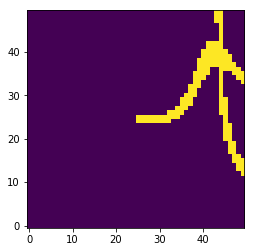

In [34]:
plt.imshow((Z1<0.1)&(Z1>-0.1) | (Z2<0.1)&(Z2>-0.1), origin='lower')

In [40]:
X1[37, 42], X2[40,40]

(0.14285714285714235, 0.63265306122448961)

In [33]:
?plt.imshow

In [53]:
x1 = np.linspace(0, 1, 10)
x2 = np.linspace(0, 1, 10)

solns = []
for _x1 in x1:
    for _x2 in x2:
        ans, info, status, msg = fsolve(objective, [_x1, _x2], full_output=1)
        if status == 1:
            solns += [(np.round(ans[0], 6), np.round(ans[1], 6))]
        else:
            print(msg)
set(solns)

# set does not work on solutions of lists or arrays

{(0.35324699999999998, 0.60608200000000001)}


# Summary



-   We learned about a special class of nonlinear functions that are polynomials, and a series of useful functions to manipulate them.

-   We learned that you can use fsolve to find solutions to coupled non-linear algebraic equations.

-   Next time, we will apply this to solving a nonlinear boundary value differential equation.

